# Important Libraries

In [1]:
import glob, os
import cv2
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout,BatchNormalization
from keras.models import Sequential
import tensorflow as tf
import keras
from keras import optimizers
from sklearn.model_selection import train_test_split

# Loading the data

In [2]:
train_dir = '/kaggle/input/sit-stand1/train1/train1'
val_dir = '/kaggle/input/sit-stand1/val1/val1'

In [3]:
classes = sorted(os.listdir(train_dir))

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    horizontal_flip = True,
)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
batch = 32
image_w = 224
image_h = 128 
training_set = train_datagen.flow_from_directory(train_dir,
                                                 subset = 'training',
                                                 target_size=(image_w, image_h),
                                                 batch_size = batch,
                                                 color_mode = 'rgb',
                                                 class_mode = 'categorical')
test_set = train_datagen.flow_from_directory(train_dir,
                                             subset = 'validation',
                                             target_size=(image_w, image_h),
                                             batch_size = batch,
                                             color_mode = 'rgb',
                                             class_mode = 'categorical')
validation_set = val_datagen.flow_from_directory(val_dir,
                                             target_size=(image_w, image_h),
                                             batch_size = batch,
                                             color_mode = 'rgb',
                                             class_mode = 'categorical')

Found 53379 images belonging to 3 classes.
Found 5930 images belonging to 3 classes.
Found 17787 images belonging to 3 classes.


In [6]:
class_dict = test_set.class_indices
print(class_dict)

{'negative': 0, 'sit': 1, 'stand': 2}


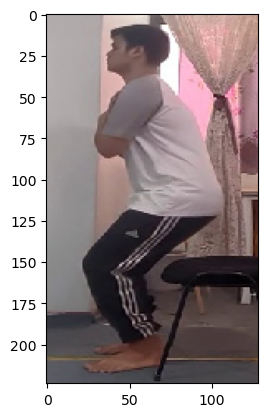

In [7]:
image,label = training_set[1]
plt.imshow(image[1])

# Model Training with CNN

In [8]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential



model = Sequential()
model.add(Conv2D(16, (2,2), input_shape=(224, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 127, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 64, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 62, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 17, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 4, 64)         0

In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [11]:
batch_size = 32
hist = model.fit(training_set, epochs = 20, batch_size = batch_size, validation_data = test_set, steps_per_epoch = 10000//batch_size)

Epoch 1/20
312/312 [==============================] - 101s 304ms/step - loss: 1.0769 - accuracy: 0.4297 - val_loss: 1.0725 - val_accuracy: 0.5027
Epoch 2/20
312/312 [==============================] - 74s 238ms/step - loss: 1.0139 - accuracy: 0.5599 - val_loss: 1.0200 - val_accuracy: 0.5555
Epoch 3/20
312/312 [==============================] - 70s 225ms/step - loss: 0.9075 - accuracy: 0.6739 - val_loss: 0.9249 - val_accuracy: 0.6631
Epoch 4/20
312/312 [==============================] - 74s 238ms/step - loss: 0.7706 - accuracy: 0.7170 - val_loss: 0.8126 - val_accuracy: 0.6956
Epoch 5/20
312/312 [==============================] - 71s 229ms/step - loss: 0.6514 - accuracy: 0.7494 - val_loss: 0.7119 - val_accuracy: 0.7315
Epoch 6/20
312/312 [==============================] - 63s 201ms/step - loss: 0.5780 - accuracy: 0.7694 - val_loss: 0.6426 - val_accuracy: 0.7312
Epoch 7/20
312/312 [==============================] - 64s 204ms/step - loss: 0.5108 - accuracy: 0.7933 - val_loss: 0.5735 - val_a

# Fine-tuning with new learning rate

In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-6), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [13]:
from keras.callbacks import EarlyStopping, TensorBoard
!rm -rf logs
%load_ext tensorboard
log_folder = "logs"
callbacks = [EarlyStopping(patience = 10), TensorBoard(log_dir = log_folder)]

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [14]:
history = model.fit(training_set, validation_data = test_set, epochs = 20, batch_size = 32, callbacks = callbacks)

Epoch 1/20
1669/1669 [==============================] - 219s 131ms/step - loss: 0.3205 - accuracy: 0.8704 - val_loss: 0.4224 - val_accuracy: 0.8216
Epoch 2/20
1669/1669 [==============================] - 207s 124ms/step - loss: 0.3174 - accuracy: 0.8731 - val_loss: 0.4327 - val_accuracy: 0.8211
Epoch 3/20
1669/1669 [==============================] - 206s 124ms/step - loss: 0.3136 - accuracy: 0.8751 - val_loss: 0.4318 - val_accuracy: 0.8196
Epoch 4/20
1669/1669 [==============================] - 208s 125ms/step - loss: 0.3098 - accuracy: 0.8766 - val_loss: 0.4330 - val_accuracy: 0.8191
Epoch 5/20
1669/1669 [==============================] - 205s 123ms/step - loss: 0.3082 - accuracy: 0.8756 - val_loss: 0.4341 - val_accuracy: 0.8196
Epoch 6/20
1669/1669 [==============================] - 204s 122ms/step - loss: 0.3064 - accuracy: 0.8777 - val_loss: 0.4275 - val_accuracy: 0.8211
Epoch 7/20
1669/1669 [==============================] - 203s 122ms/step - loss: 0.3046 - accuracy: 0.8780 - val_

# Plotting the training and validation accuracy

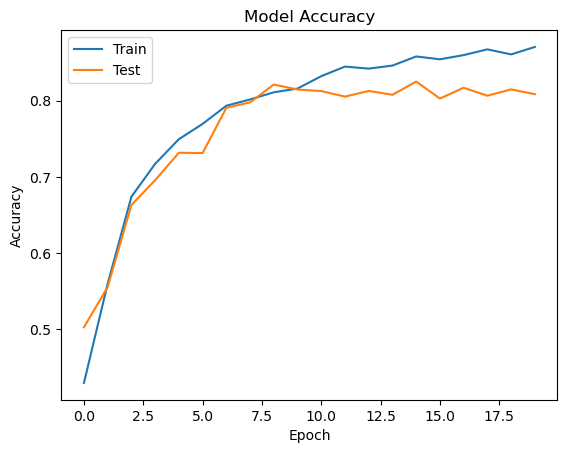

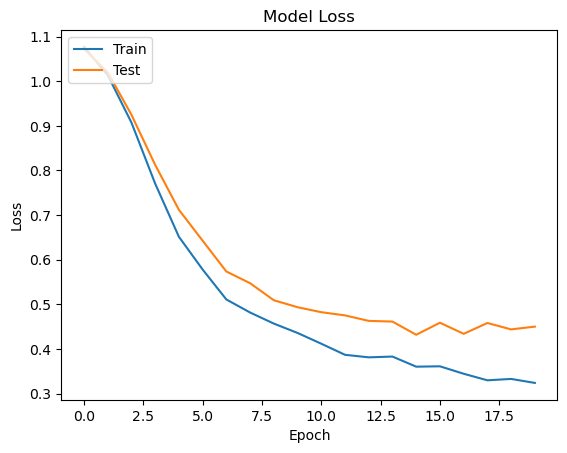

In [15]:
acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]

loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

%matplotlib inline

# Display History for Model Accuracy
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(acc)
plt.plot(val_acc)
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

# Display History for Model Loss
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.plot(loss)
plt.plot(val_loss)
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

In [16]:
model.save('/kaggle/working/cnn_model.h5')